In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv("Mall_Customers.csv")

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
X = customer_data.iloc[:,[3,4]].values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [16]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    

In [66]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972]

plot an elbow graph

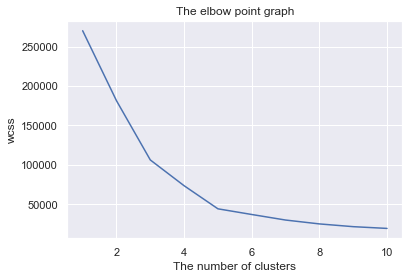

In [17]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('The number of clusters')
plt.ylabel('wcss')
plt.show()

Optimum Number of cluster = 5

In [73]:
Kmeans = KMeans(n_clusters = 5,  init = 'k-means++', random_state = 0)

Y = Kmeans.fit_predict(X)
print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [74]:
customer_data['Classified'] = Y
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Classified
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [52]:
Centriod= Kmeans.cluster_centers_
print(Centriod)

[[55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


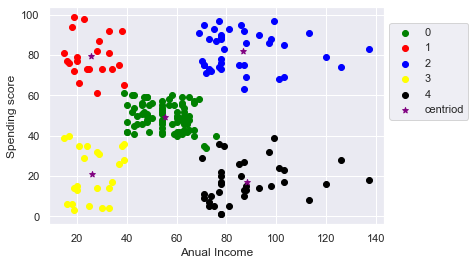

In [65]:
customer_data1 = customer_data[customer_data.Classified == 0]
customer_data2 = customer_data[customer_data.Classified == 1]
customer_data3 = customer_data[customer_data.Classified == 2]
customer_data4 = customer_data[customer_data.Classified == 3]
customer_data5 = customer_data[customer_data.Classified == 4]

plt.scatter(customer_data1['Annual Income (k$)'], customer_data1['Spending Score (1-100)'], color = 'green', label = '0')
plt.scatter(customer_data2['Annual Income (k$)'], customer_data2['Spending Score (1-100)'], color = 'red', label = '1')
plt.scatter(customer_data3['Annual Income (k$)'], customer_data3['Spending Score (1-100)'], color = 'blue', label = '2')
plt.scatter(customer_data4['Annual Income (k$)'], customer_data4['Spending Score (1-100)'], color = 'yellow', label = '3')
plt.scatter(customer_data5['Annual Income (k$)'], customer_data5['Spending Score (1-100)'], color = 'black', label = '4')
plt.scatter(Centriod[:,0], Centriod[:,1], color = 'purple', marker = '*', label = 'centriod')

plt.legend(bbox_to_anchor = (1.0, 0.95)) #loc = 'lower right'
plt.xlabel('Anual Income')
plt.ylabel('Spending score')
plt.show()

In [42]:
customer_data1 = customer_data[customer_data.Classified == 0]
customer_data1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Classified
43,44,Female,31,39,61,0
46,47,Female,50,40,55,0
47,48,Female,27,40,47,0
48,49,Female,29,40,42,0
49,50,Female,31,40,42,0
...,...,...,...,...,...,...
121,122,Female,38,67,40,0
122,123,Female,40,69,58,0
126,127,Male,43,71,35,0
132,133,Female,25,72,34,0


In [43]:
customer_data2 = customer_data[customer_data.Classified == 1]
customer_data2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Classified
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
11,12,Female,35,19,99,1
13,14,Female,24,20,77,1
15,16,Male,22,20,79,1
17,18,Male,20,21,66,1
19,20,Female,35,23,98,1
